In [1]:
import webbpsf
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits
import astropy.units as u
import poppy

In [3]:
webbpsf.setup_logging()
nc = webbpsf.NIRCam()
nc.filter =  'F444W'
nc.image_mask = 'MASK335R'
nc.pupil_mask = 'CIRCLYOT'
psf = nc.calc_psf(oversample=1, return_intermediates=True, monochromatic=4.5e-6)  

WebbPSF log messages of level INFO and above will be shown.
WebbPSF log outputs will be directed to the screen.
[webbpsf] NIRCam aperture name updated to NRCA1_FULL
[webbpsf] NIRCam pixel scale switched to 0.062907 arcsec/pixel for the long wave channel.
[webbpsf] NIRCam aperture name updated to NRCA5_FULL
[webbpsf] NIRCam aperture name updated to NRCA5_FULL_MASK335R
[webbpsf] NIRCam pupil mask setter: aperturename NRCA5_FULL_MASK335R
[  poppy] Monochromatic calculation requested.
[  poppy] PSF calc using fov_arcsec = 5.000000, oversample = 1, number of wavelengths = 1
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: JWST+NIRCam
[  poppy] JWST Entrance Pupil: Loaded amplitude transmission from /home/rferrer/jwsttesting/webbpsf_req_files/webbpsf-data/jwst_pupil_RevW_npix1024.fits.gz
[  poppy] JWST Entrance Pupil: Loaded OPD from /home/rferrer/jwsttesting/webbpsf_req_files/webbpsf-data/JWST_OTE_OPD_cycle1_example_2022-07-30.fits
[webbpsf] Loading field depend

In [4]:
optsys = nc.get_optical_system()

[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: JWST+NIRCam
[  poppy] JWST Entrance Pupil: Loaded amplitude transmission from /home/rferrer/jwsttesting/webbpsf_req_files/webbpsf-data/jwst_pupil_RevW_npix1024.fits.gz
[  poppy] JWST Entrance Pupil: Loaded OPD from /home/rferrer/jwsttesting/webbpsf_req_files/webbpsf-data/JWST_OTE_OPD_cycle1_example_2022-07-30.fits
[webbpsf] Loading field dependent model parameters from /home/rferrer/jwsttesting/webbpsf_req_files/webbpsf-data/NIRCam/OPD/field_dep_table_nircam.fits
[webbpsf] Calculating field-dependent OTE OPD at v2 = 1.790 arcmin, v3 = -6.752 arcmin
[  poppy] Added pupil plane: JWST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] Added pupil plane: NIRCamLWA internal WFE at V2V3=(1.79,-6.75)', near Z335R_A
[  poppy] Added image plane: MASK335R
[  poppy] CIRCLYOT: Loaded amplitude transmission from /home/rferrer/jwsttesting/webbpsf_req_files/webbpsf-data/NIRCam/optics/NIRCam_

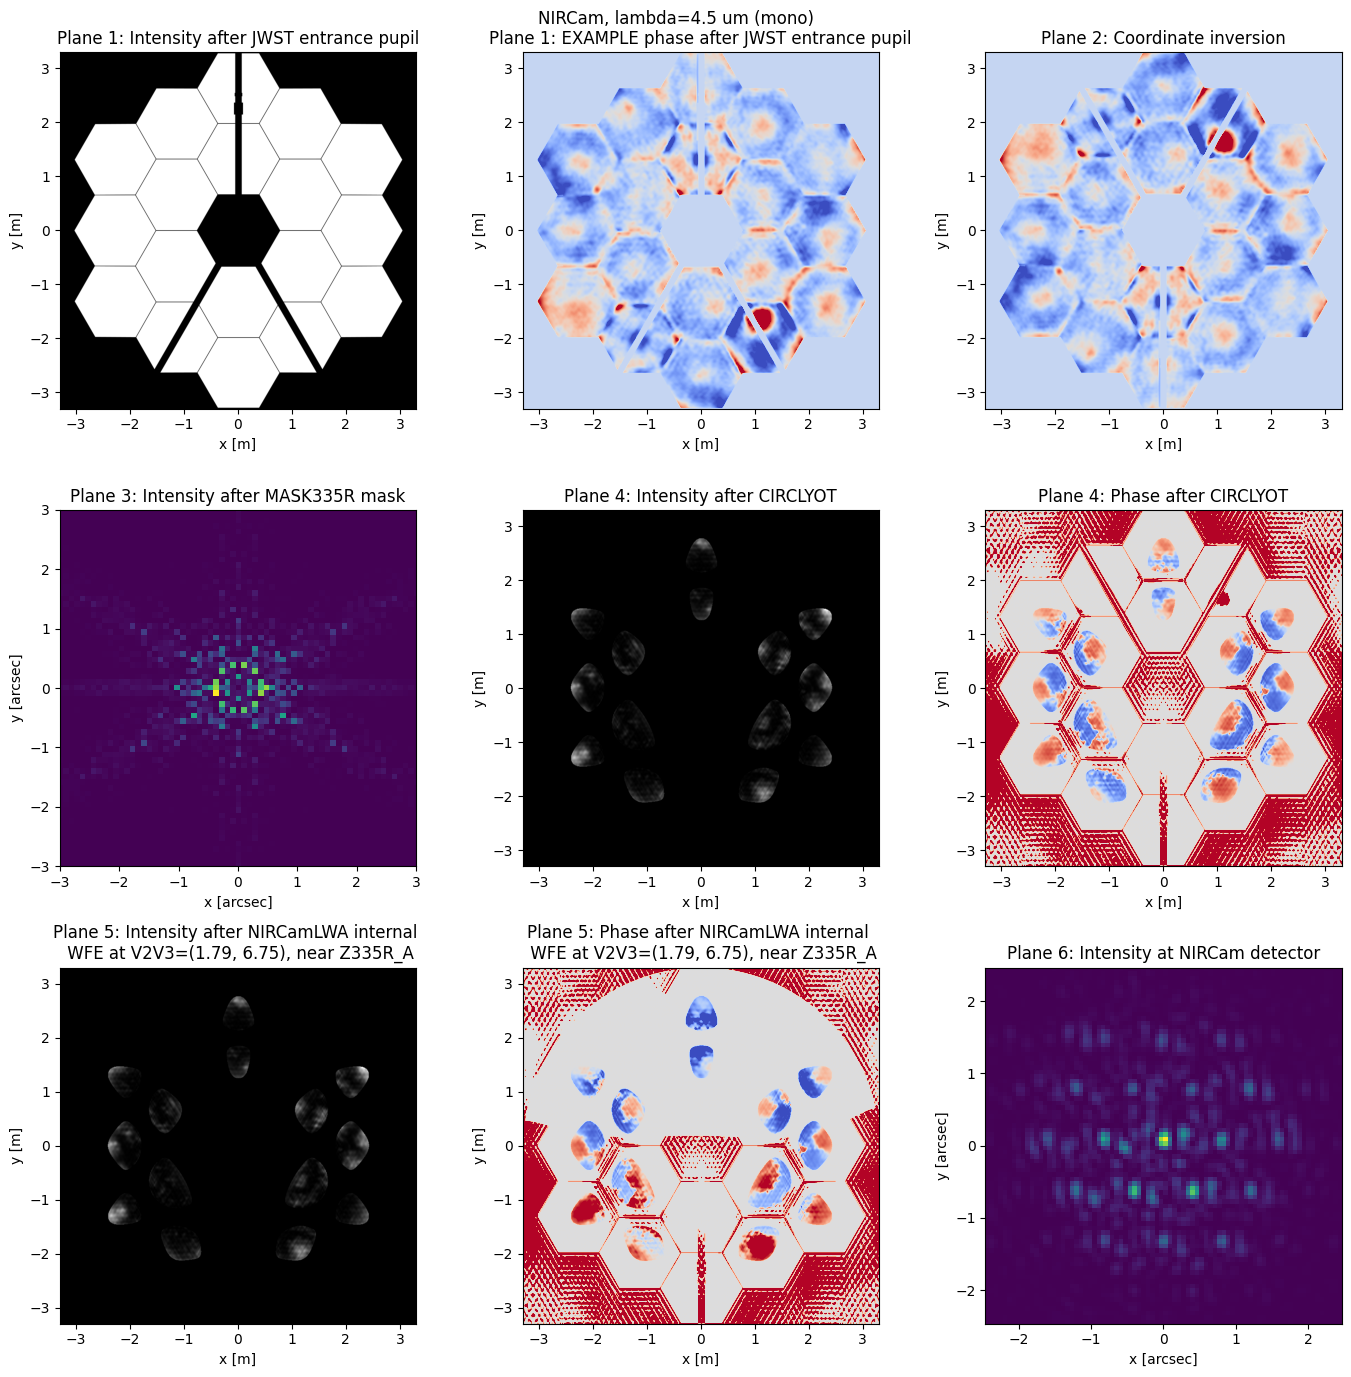

In [26]:
plt.figure(figsize=[14,14])

plt.subplot(331)
plt.imshow(psf[1][0].intensity, origin='lower', extent=[-3.29850765,3.29850765,-3.29850765,3.29850765], cmap='grey')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Plane 1: Intensity after JWST entrance pupil')

plt.subplot(332)
plt.imshow(psf[1][0].wfe.value, origin='lower', extent=[-3.29850765,3.29850765,-3.29850765,3.29850765], cmap='coolwarm', vmax=0.204333396073629e-06, vmin=-1.464629965652458e-07)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Plane 1: EXAMPLE phase after JWST entrance pupil')

plt.subplot(333)
plt.imshow(psf[1][1].wfe.value, origin='lower', extent=[-3.29850765,3.29850765,-3.29850765,3.29850765], cmap='coolwarm', vmax=0.204333396073629e-06, vmin=-1.464629965652458e-07)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Plane 2: Coordinate inversion')

plt.subplot(334)
plt.imshow(psf[1][2].intensity, origin='lower', extent=[-47.9782645, 47.88455695,-47.9782645, 47.88455695])
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel('x [arcsec]')
plt.ylabel('y [arcsec]')
plt.title('Plane 3: Intensity after MASK335R mask')

plt.subplot(335)
plt.imshow(psf[1][3].intensity, origin='lower', extent=[-3.29850765,3.29850765,-3.29850765,3.29850765], cmap='grey')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Plane 4: Intensity after CIRCLYOT')

plt.subplot(336)
plt.imshow(psf[1][3].wfe.value, origin='lower', extent=[-3.29850765,3.29850765,-3.29850765,3.29850765], cmap='coolwarm', vmax=1.2431443096628787e-06, vmin=-1.2431443096628787e-06)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Plane 4: Phase after CIRCLYOT')

plt.subplot(337)
plt.imshow(psf[1][4].intensity, origin='lower', extent=[-3.29850765,3.29850765,-3.29850765,3.29850765], cmap='grey')
# plt.imshow(psf[1][4].intensity, origin='lower', extent=[-3.29850765,3.29850765,-3.29850765,3.29850765], cmap='grey')#, vmax=1.2431443096628787e-06, vmin=-1.2431443096628787e-06)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Plane 5: Intensity after NIRCamLWA internal \n WFE at V2V3=(1.79, 6.75), near Z335R_A')

plt.subplot(338)
plt.imshow(psf[1][4].wfe.value, origin='lower', extent=[-3.29850765,3.29850765,-3.29850765,3.29850765], cmap='coolwarm', vmax=1.2431443096628787e-06, vmin=-1.2431443096628787e-06)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Plane 5: Phase after NIRCamLWA internal \n WFE at V2V3=(1.79, 6.75), near Z335R_A')

plt.subplot(339)
plt.imshow(psf[1][5].intensity, origin='lower', extent=[-2.46575531, 2.46575531,-2.46575531, 2.46575531])
plt.xlabel('x [arcsec]')
plt.ylabel('y [arcsec]')
plt.title('Plane 6: Intensity at NIRCam detector')

plt.suptitle('NIRCam, lambda=4.5 um (mono)')

plt.tight_layout()